In [9]:
import pandas as pd

# 파일 경로 설정
file_path = '/Users/isuo/Desktop/bigdata/term_project/소재부품장비산업별_생산통계지수_20240605094344.xlsx'

# 엑셀 파일 읽기
production_data = pd.read_excel(file_path)

# 데이터프레임의 열 이름 출력하여 확인
print(production_data.columns.tolist())

# 데이터프레임의 첫 몇 행 확인
print(production_data.head())


['소재부품장비산업별(1)', '소재부품장비산업별(2)', '2024.01', '2024.01.1', '2024.01.2', '2024.01.3', '2024.01.4', '2024.01.5', '2024.02', '2024.02.1', '2024.02.2', '2024.02.3', '2024.02.4', '2024.02.5', '2024.03', '2024.03.1', '2024.03.2', '2024.03.3', '2024.03.4', '2024.03.5']
   소재부품장비산업별(1)  소재부품장비산업별(2)          2024.01  2024.01.1        2024.01.2  \
0  소재부품장비산업별(1)  소재부품장비산업별(2)  생산지수 (2015=100)  생산증감률 (%)  출하지수 (2015=100)   
1        소재부품장비            소계              108         13              108   
2            소재            소계               72         10               71   
3          섬유제품            소계               52         16               51   
4           NaN       제사 및 방적               38         -4               37   

   2024.01.3        2024.01.4  2024.01.5          2024.02  2024.02.1  \
0  출하증감률 (%)  재고지수 (2015=100)  재고증감률 (%)  생산지수 (2015=100)  생산증감률 (%)   
1         13              147         20             96.6        5.1   
2          6              108         14             6

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


In [21]:
# 필요한 열 선택 (실제 열 이름에 맞게 수정)
selected_columns = ['소재부품장비산업별(1)', '소재부품장비산업별(2)', '2024.01', '2024.01.1', '2024.01.2', 
                    '2024.01.3', '2024.01.4', '2024.01.5', '2024.02', '2024.02.1', '2024.02.2', 
                    '2024.02.3', '2024.02.4', '2024.02.5', '2024.03', '2024.03.1', '2024.03.2', 
                    '2024.03.3', '2024.03.4', '2024.03.5']

# 데이터에서 필요한 열만 선택
production_data = production_data[selected_columns]

# 데이터 확인
print(production_data.head())


   소재부품장비산업별(1)  소재부품장비산업별(2)          2024.01  2024.01.1        2024.01.2  \
0  소재부품장비산업별(1)  소재부품장비산업별(2)  생산지수 (2015=100)  생산증감률 (%)  출하지수 (2015=100)   
1        소재부품장비            소계              108         13              108   
2            소재            소계               72         10               71   
3          섬유제품            소계               52         16               51   
4           NaN       제사 및 방적               38         -4               37   

   2024.01.3        2024.01.4  2024.01.5          2024.02  2024.02.1  \
0  출하증감률 (%)  재고지수 (2015=100)  재고증감률 (%)  생산지수 (2015=100)  생산증감률 (%)   
1         13              147         20             96.6        5.1   
2          6              108         14             67.8        0.1   
3          2              101         31             43.8      -17.7   
4         -9              104         49             29.3      -22.8   

         2024.02.2  2024.02.3        2024.02.4  2024.02.5          2024.03  \
0  출하지수 (2015=100)  

In [22]:
# 필요한 데이터만 추출
production_df = production_data.iloc[1:].copy()
production_df.columns = ['Category', 'Subcategory', 'Production Index', 'Production Rate Change', 
                         'Shipment Index', 'Shipment Rate Change', 'Inventory Index', 'Inventory Rate Change',
                         'Production Index 2', 'Production Rate Change 2', 'Shipment Index 2', 
                         'Shipment Rate Change 2', 'Inventory Index 2', 'Inventory Rate Change 2',
                         'Production Index 3', 'Production Rate Change 3', 'Shipment Index 3', 
                         'Shipment Rate Change 3', 'Inventory Index 3', 'Inventory Rate Change 3']

# 필요한 열만 선택
production_df = production_df[['Category', 'Subcategory', 'Production Index', 'Production Rate Change', 
                               'Shipment Index', 'Shipment Rate Change', 'Inventory Index', 'Inventory Rate Change']]

# 데이터 타입 변환
for col in ['Production Index', 'Production Rate Change', 'Shipment Index', 'Shipment Rate Change', 
            'Inventory Index', 'Inventory Rate Change']:
    production_df[col] = pd.to_numeric(production_df[col], errors='coerce')

# 결측치 제거
production_df.dropna(inplace=True)

# 데이터 확인
print(production_df.head())


       Category Subcategory  Production Index  Production Rate Change  \
1        소재부품장비          소계               108                      13   
2            소재          소계                72                      10   
3          섬유제품          소계                52                      16   
9   화학물질 및 화학제품          소계                82                       4   
21  고무 및 플라스틱제품          소계                85                      30   

    Shipment Index  Shipment Rate Change  Inventory Index  \
1              108                    13              147   
2               71                     6              108   
3               51                     2              101   
9               81                     2              128   
21              79                    14              149   

    Inventory Rate Change  
1                      20  
2                      14  
3                      31  
9                       8  
21                     19  


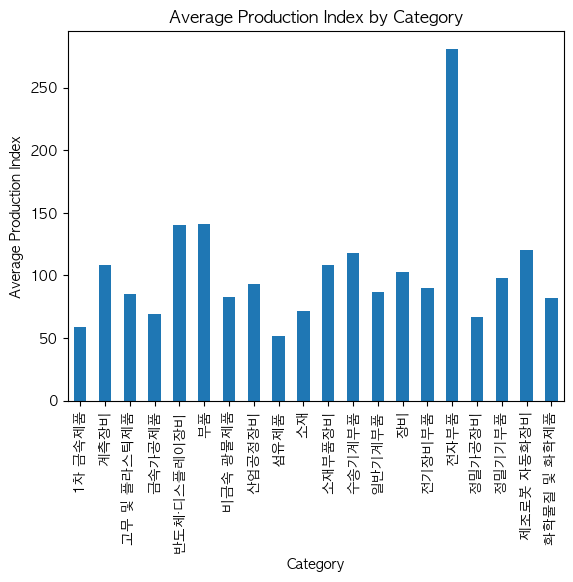

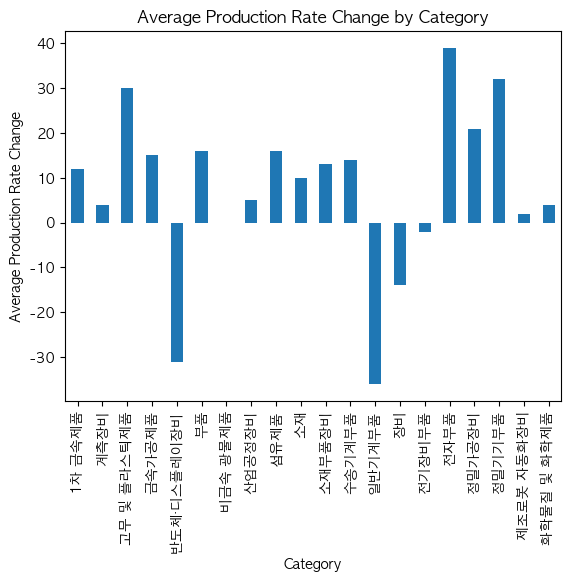

In [24]:
# 카테고리별 생산증감률 분석
production_df.groupby('Category')['Production Rate Change'].mean().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Production Rate Change')
plt.title('Average Production Rate Change by Category')
plt.show()